# Car Price Prediction

The aim of this project, Car Price Prediction Using Regression, is to predict the resale price of cars in major Indian metro cities using regression models. The analysis is based on key vehicle features such as company, model, fuel type, body style, odometer reading, ownership type, warranty, and quality score

### About the Dataset
The "Indian IT Cities Car Dataset 2023" is a comprehensive collection of data that offers valuable insights into the car market across major metro cities in India. This dataset provides a wealth of information on a wide range of car listings, encompassing details such as car models, variants, pricing, fuel types, dealer locations, warranty information, colors, kilometers driven, body styles, transmission types, ownership history, manufacture dates, model years, dealer names, CNG kit availability, and quality scores.

### Data Dictionary
| Column Name | Description |
| --- | --- |
|ID|Unique ID for each listing|
|Company|Name of the car manufacturer|
|Model|Name of the car model|
|Variant|Name of the car variant|
|Fuel Type|Fuel type of the car|
|Color|Color of the car|
|Killometer|Number of kilometers driven by the car|
|Body Style|Body style of the car|
|Transmission Type|Transmission type of the car|
|Manufacture Date|Manufacture date of the car|
|Model Year|Model year of the car|
|CngKit|Whether the car has a CNG kit or not|
|Price|Price of the car|
|Owner Type|Number of previous owners of the car|
|Dealer State|State in which the car is being sold|
|Dealer Name|Name of the dealer selling the car|
|City|City in which the car is being sold|
|Warranty|Warranty offered by the dealer|
|Quality Score|Quality score of the car|

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/Cars.csv')

## Data Preprocessing Part 1

In [8]:
df.shape

(1064, 19)

In [9]:
df.columns

Index(['Id', 'Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer',
       'BodyStyle', 'TransmissionType', 'ManufactureDate', 'ModelYear',
       'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City',
       'Warranty', 'QualityScore'],
      dtype='object')

In [10]:
df.drop('Id',axis=1,inplace=True)

In [11]:
df.dtypes

,0
Company,object
Model,object
Variant,object
FuelType,object
Colour,object
Kilometer,int64
BodyStyle,object
TransmissionType,object
ManufactureDate,object
ModelYear,int64


Type casting Price column to float

In [12]:
def convert_amount(amount_str):
    if "Lakhs" in amount_str:
        return float(amount_str.replace(' Lakhs', '').replace(',', '')) * 100000
    else:
        return float(amount_str.replace(',', ''))

df['Price'] = df['Price'].apply(convert_amount)

In [13]:
df.isnull().sum()/df.shape[0]*100

,0
Company,0.000000
Model,0.000000
Variant,0.000000
FuelType,0.093985
Colour,0.000000
Kilometer,0.000000
BodyStyle,0.000000
TransmissionType,67.105263
ManufactureDate,0.000000
ModelYear,0.000000


Here in the dataset, three columns have missing values - FuelType, TransmissionType and CngKit. I will be removing the CngKit column becuase in majority of the cars don't run on CNG and the CNG cars can be easily identified from the FuelType column. So we will replace the null values with 'No' in CngKit column. In case of the TransmissionType, 67% data is missing, so we can't include this column in our analysis. In case of the FuelType, we will drop the rows with null values.

In [14]:
df.drop('CngKit', axis=1, inplace=True)

In [15]:
df.drop('TransmissionType',axis=1,inplace=True)

In [16]:
df['FuelType'].dropna(inplace=True)

Dropping ManufacturerDate column as it the age of the car and we already have the ModelYear column

In [17]:
df.drop('ManufactureDate', axis = 1, inplace=True)

In [18]:
df.drop('Variant', axis = 1, inplace=True)

Changing the model year column to car age column

In [19]:
df['ModelYear'] = 2023 - df['ModelYear']
df.rename(columns={'ModelYear':'Age'},inplace=True)

In [20]:
for i in df.columns:
    print(i,df[i].nunique())

Company 23
Model 218
FuelType 5
Colour 76
Kilometer 1006
BodyStyle 10
Age 17
Price 362
Owner 4
DealerState 10
DealerName 57
City 11
Warranty 2
QualityScore 43


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the distribution of data across all the columns, in order to understand the data in a better way. After that I will be looking at the relationship between the target variable and the independent variables.

### Car Company

/tmp/ipython-input-2062559126.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Company'],order=df['Company'].value_counts().index, palette = 'Set1').set_title('Number of cars by company')


Text(0.5, 1.0, 'Number of cars by company')

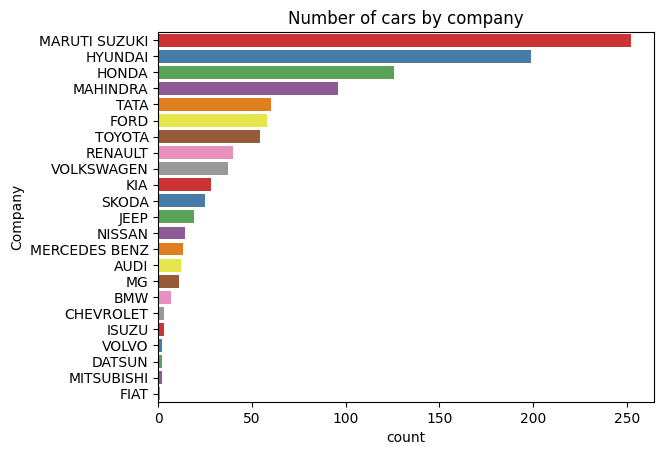

In [21]:
sns.countplot(df['Company'],order=df['Company'].value_counts().index, palette = 'Set1').set_title('Number of cars by company')

From this graph, we get know about the distribution of cars in the dataset from different companies.There are total 23 companies in the dataset, out which Maruti Suzuki, Hyundai, Honda, Mahindra and Tata are the top five companies who cars are for sale. Therefore, we can assume that these company's car are more durable and have a good resale value.

### Top 10 Car Models

/tmp/ipython-input-972168075.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Model'],order=df['Model'].value_counts().iloc[:10].index, palette = 'Set1').set_title('Top 10 Car Models')


Text(0.5, 1.0, 'Top 10 Car Models')

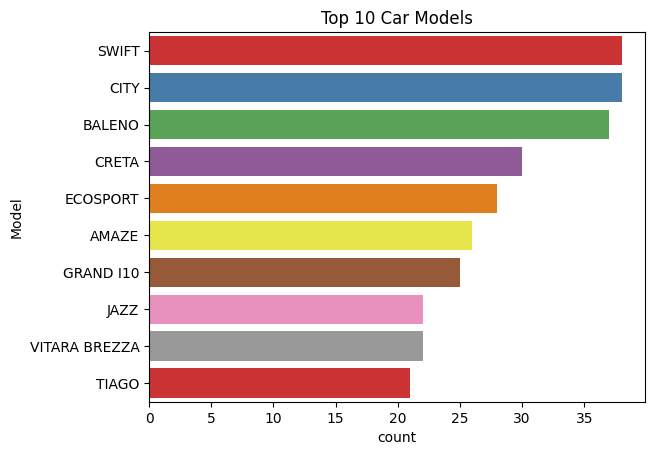

In [22]:
sns.countplot(df['Model'],order=df['Model'].value_counts().iloc[:10].index, palette = 'Set1').set_title('Top 10 Car Models')

Honda City and Swift are the top two car models in the dataset, followed by Baleno, Creata and EcoSport. Therefore, we can assume that these car models are more durable and have a good resale value. Moreover, this graph also shows that Honda City and Swift are more in demand in the car market.

### Car Fuel Type

/tmp/ipython-input-2829116679.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'FuelType', data = df, palette = 'Set1').set_title('Number of cars by Fuel Type')


Text(0.5, 1.0, 'Number of cars by Fuel Type')

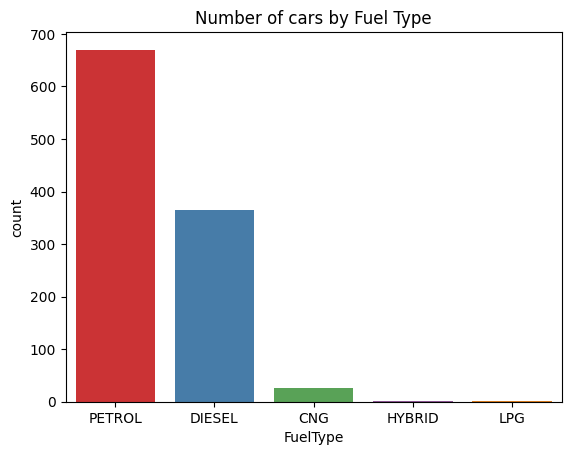

In [23]:
sns.countplot(x = 'FuelType', data = df, palette = 'Set1').set_title('Number of cars by Fuel Type')

Majority of cars for resale have a petrol engine which is more than 650 cars, followed by 350 cars with diesel engine. Very few of the cars have CNG engine and negligible number of cars are hybrid or on LPG. Thereofore, we can assume that petrol and diesel cars are more in demand in the car market.

### Odometre Reading

Text(0.5, 1.0, 'Odometer Reading')

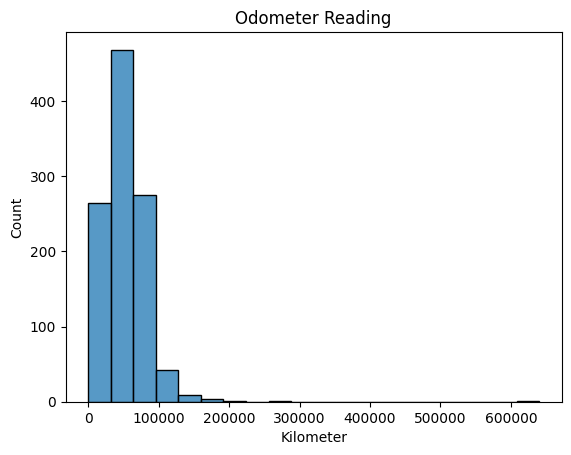

In [24]:
sns.histplot(x = 'Kilometer', data = df, bins = 20).set_title('Odometer Reading')

This graph shows the distribution of the odometer readings of the cars in the dataset. From the graph, we can see that most of the cars have odometer reading less than 100000 km. To be more particular majority of cars are driven for 30000 km to 50000 km. Thefore, we can assume that cars with odometer reading less than 100000 km are more in demand in the car market will have a good resale value.

### Body Style

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

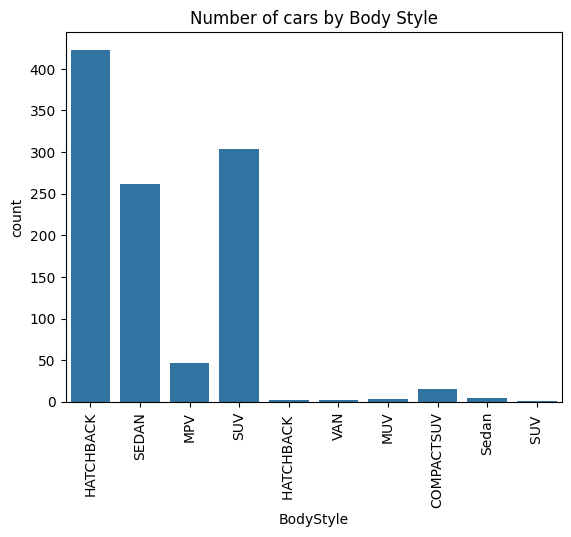

In [25]:
sns.countplot(x = 'BodyStyle', data = df).set_title('Number of cars by Body Style')
plt.xticks(rotation = 90)

According to this graph, most of the cars have HatchBack, SUV and Sedan body style, which tells us about the market demand of these body styles. Therefore, we can assume that cars with HatchBack, SUV and Sedan body style are more in demand in the car market will have a good resale value.

### Car Age Distribution

Text(0.5, 1.0, 'Car age distribution')

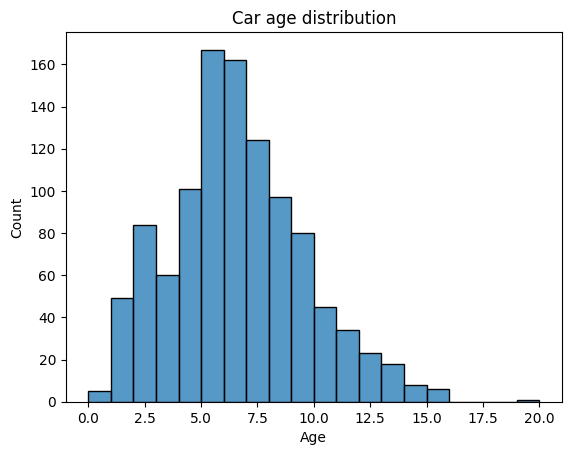

In [26]:
sns.histplot(x = 'Age', data = df, bins = 20).set_title('Car age distribution')

Age of the car plays an important role in deciding its resale value. Here, in the dataset cars that age between 5 to 7 years are more in number. Moreover majority of the cars age more than 5 years, which affect their resale value. However, there are still significant number of cars with age less than 5 years, thereofore, I assume they would have higher resale value.

In addition to that, we can see than one car has age near 20 years which could be an outlier.

### Price Distribution

Text(0.5, 1.0, 'Car price distribution')

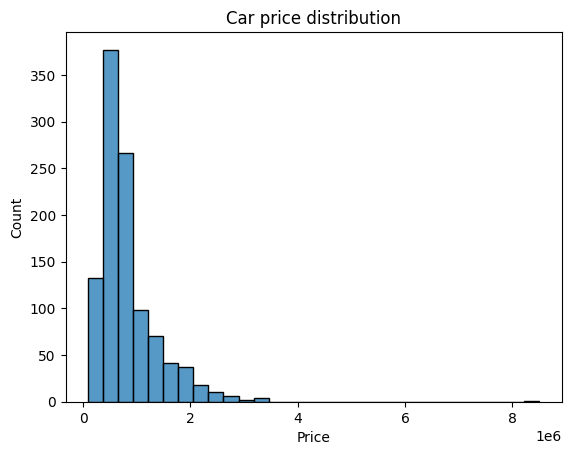

In [27]:
sns.histplot(x = 'Price', data =df, bins = 30).set_title('Car price distribution')

This graph help us to know about the distribution of the car prices in the dataset. In the dataset, most of the cars have price is between 3 to 9 lakhs, with maximum cars between 3 to 6 lakhs. Therefore, we can assume that cars with price between 3 to 9 lakhs are more in demand in the car market. Moreover there are some cars with resale price more than 20 lakhs, which could be possible for luxury cars or it could be an outlier.

### Location based Distribution

/tmp/ipython-input-767862949.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
/tmp/ipython-input-767862949.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
/tmp/ipython-input-767862949.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'Car Estate'),
 Text(7, 0, 'OM Motors'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

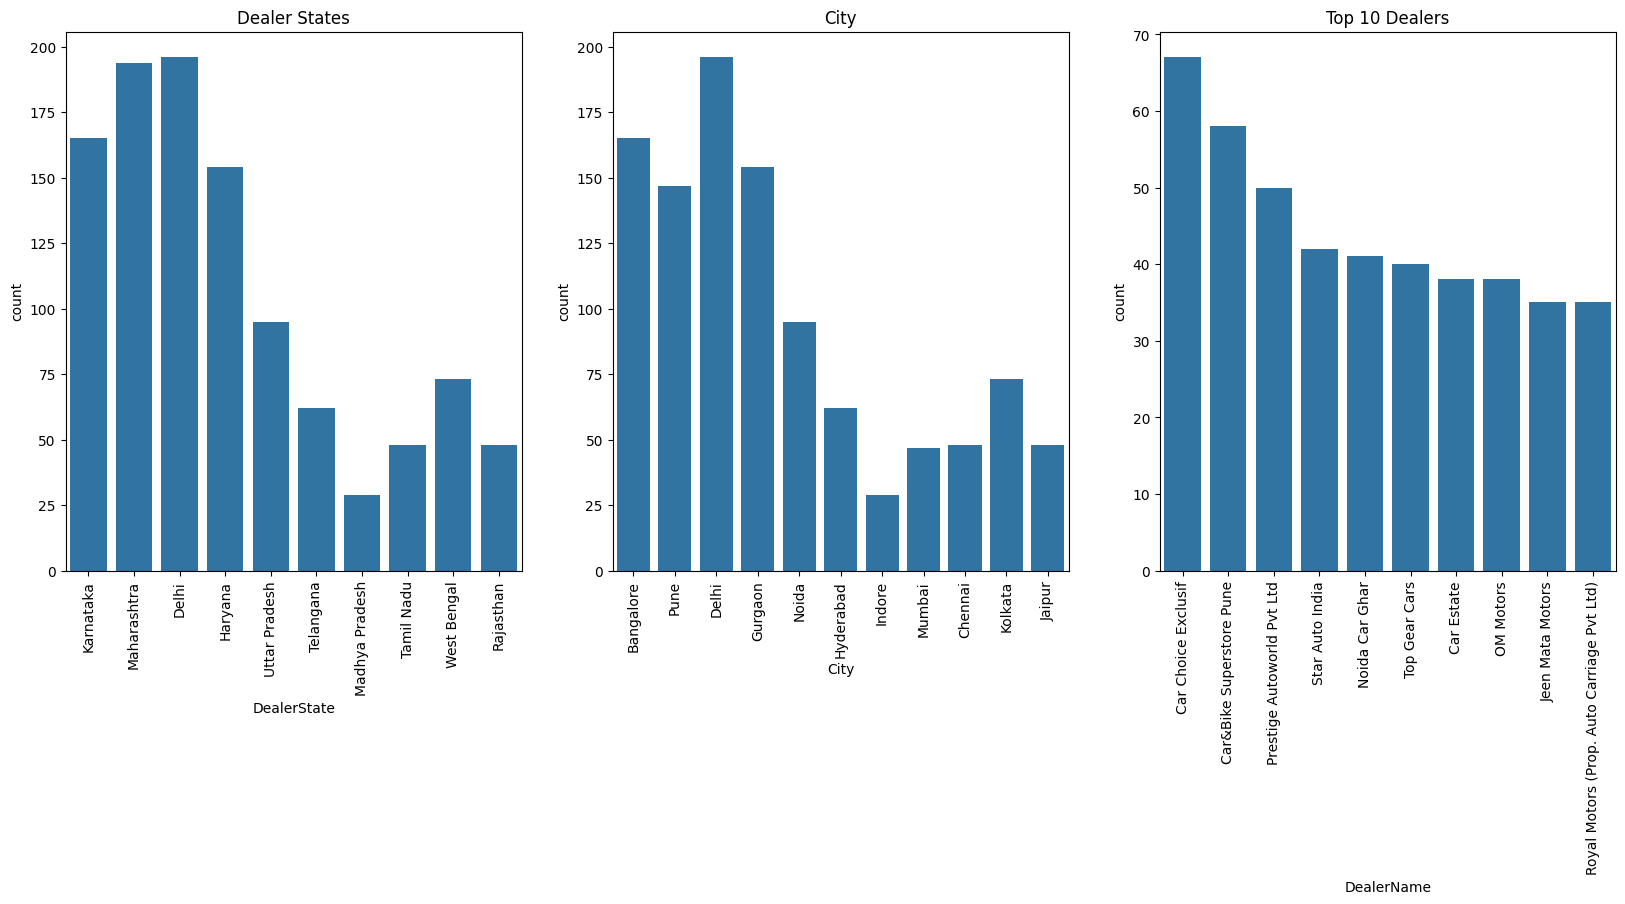

In [28]:
fig, ax = plt.subplots(1,3,figsize=(20,7))
sns.countplot(x = 'DealerState', data = df, ax = ax[0]).set_title('Dealer States')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
sns.countplot(x = 'City', data = df, ax = ax[1]).set_title('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
sns.countplot(x = 'DealerName', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2]).set_title('Top 10 Dealers')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

These graphs shows the distribution of cars based on their dealer state, city and Dealer Name. In the dealer state graph, we see that Delhi and Maharashtra have the highest number of cars for sale followed by Karnataka and Haryana. In the dealer city graph, we see that Delhi has the highest number of cars which is obvious from the the previous graph, however in contrast to the previous graph, Banglore has more cars for sale than Pune, infact Pune has lower car count than Gurgaon. In the dealer name graph, we see that Car Choice Exclusif, Car&Bike Superstore Pune and Prestige Autoworld Pvt Ltd are moung the top 3 dealers with highest number of cars for sale.

### Car Owner Type

Text(0.5, 1.0, 'Number of cars by Owner Type')

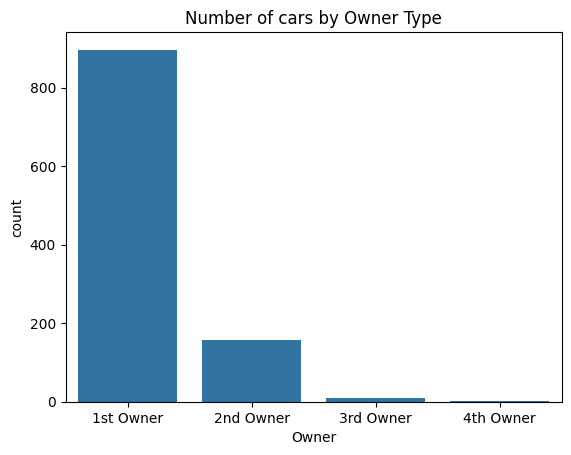

In [29]:
sns.countplot(x = 'Owner', data = df).set_title('Number of cars by Owner Type')

The car owner type has a huge impact on its resale value. Majority of the cars that are been sold are 1at Owner cars followed by 2nd Owner cars which are significantly less in number as compared to 1st Owner. Moreover, the 3rd and 4th owner cars are very less in number. Therefore, we can assume that 1st Owner cars are more preferred in the car market and have a good resale value.

### Warranty

Text(0.5, 1.0, 'Number of cars by Warranty')

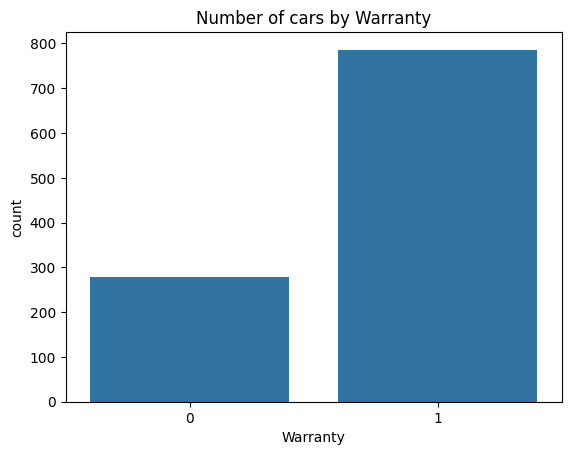

In [30]:
sns.countplot(x = 'Warranty', data = df).set_title('Number of cars by Warranty')

This graphs shows the number of cars for sale that come with a warranty from the dealership company. The warranty plays a major role and customers prefer to purchase a car with warranty, it has been shown in the dataset as well, where we can see than the number cars with warranty is almost twice the number of cars without warranty.

### Quality Score Distribution

Text(0.5, 1.0, 'Quality Score Distribution')

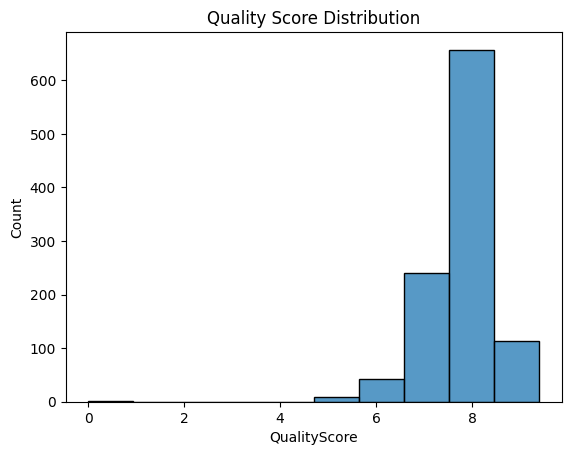

In [31]:
sns.histplot(x = 'QualityScore', data = df, bins = 10).set_title('Quality Score Distribution')

Quality score is an important feature which has a huge impact on the car sales and its preference by the customers. Cars with higher quality scores tend to have a much higher resale value and are more preferred by the customers. In the dataset, most of the cars have a decent quality score between 7-8, which highlights that the cars are thoroughly checked before being sold in the car market. However, there are some cars with quality score less than 5, which could be due to the fact that they are not in good condition or they are very old.

##### Till now, I have visualized the distribution of the data and got a better understanding of the data. Now, I will be looking at the relationship between the Car Price aans the independent variables.

### Top 10 Car Companies by Price

Text(0.5, 1.0, 'Top 10 car Companies by price')

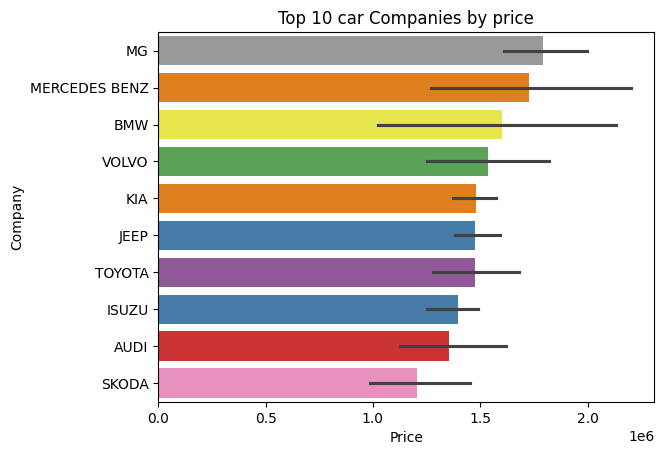

In [32]:
sns.barplot(y = 'Company', x = 'Price', data = df, order = df.groupby('Company')['Price'].mean().sort_values(ascending=False).iloc[:10].index, hue = 'Company', palette= 'Set1').set_title('Top 10 car Companies by price')

This graphs highlights the top 10 car companies in the dataset with the highest resale value. The MG, Mercedes Benz and BMW are the top 3 car companies with the highest resale value, since these are luxury car companies. The list also includes Volvo. followed by KIA, Jeep and Toyota. Surprisingly Audi has much lower resale price has compared to the other luxury car companies which might be due to other features.

Moreover, my prevous hypothesis, about the car companies -Maruti Suzuki, Hyundai, Honda, Mahindra and Tata, was wrong as they are not in the top 10 list. This means that these companies cars are in greater number due to their demand because of low price

### Top 10 Car Models by Price

Text(0.5, 1.0, 'Top 10 car Models by price')

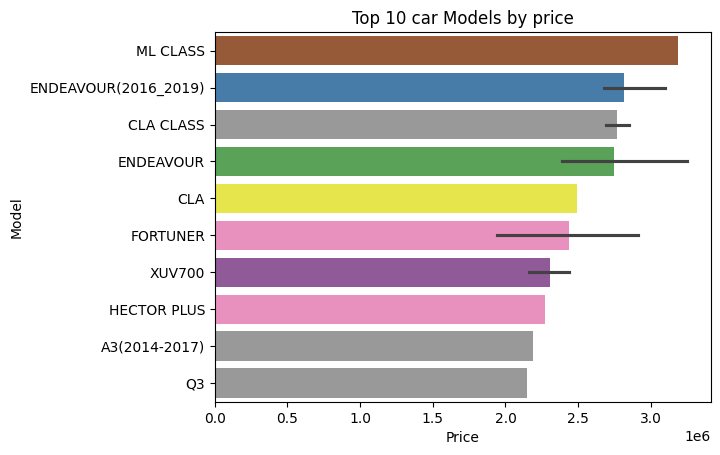

In [33]:
sns.barplot(y = 'Model', x = 'Price', data = df, order = df.groupby('Model')['Price'].mean().sort_values(ascending=False).iloc[:10].index, hue = 'Model', palette= 'Set1').set_title('Top 10 car Models by price')

This graph shows the relation between the car model and it resale value and we can see that it shows similarity woth the previous graph. The car models - ML Class, Endeavour(2016_2019), CLA class are the top three models with highest resale value, followed by CLA, Fortuner and XUV700. Like the previous graph, the audi model A3 is at the 9th position with a much lower resale value as compared to the other models.

In the car model also my hypothesis was wrong as I assummed that Honda City and Swift are the top two car models in the dataset, followed by Baleno, Creata and EcoSport. Therefore, we came to know that these car in higher number due to their high demnad because of low price.

### Car Fuel Type and Price

Text(0.5, 1.0, 'Price by Fuel Type')

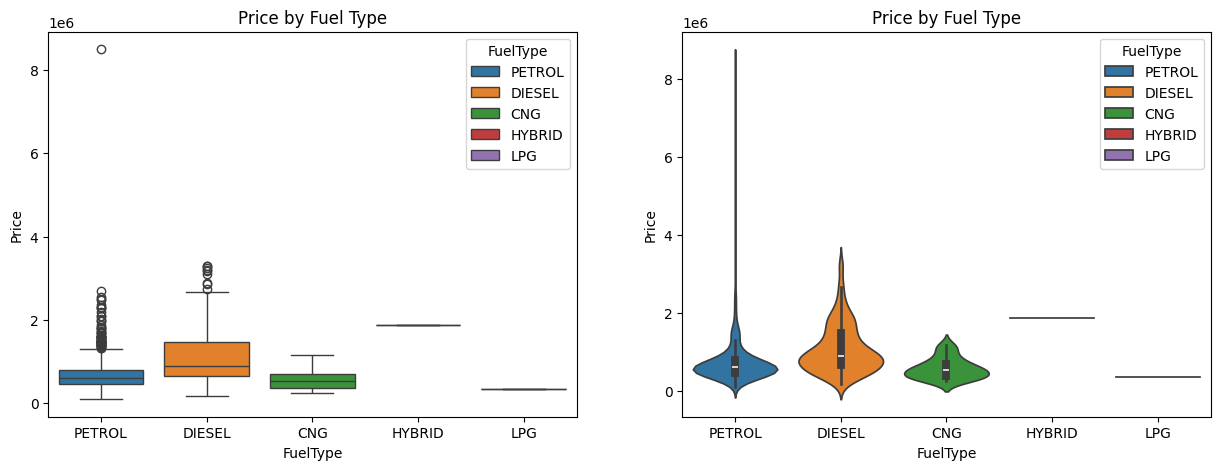

In [34]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'FuelType', y = 'Price', data = df, ax = ax[0], hue = 'FuelType').set_title('Price by Fuel Type')
sns.violinplot(x = 'FuelType', y = 'Price', data = df, ax = ax[1], hue = 'FuelType').set_title('Price by Fuel Type')

The above plots visualizes the relationship between the car fuel type and its resale value. In the boxplot we can see than cars with diesel fuel type have higher resale value than petrol and CNG and LPG. In the violin plot, we can see that the distribution of the price for diesel cars is more concentrated between 10 to 20 lakh as compared to Petrol. From this it is cleared that, customers prefer petrol and diesel car than other fuel type and the diesel cars are more in demand in the car market.

### Body Style and Price

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

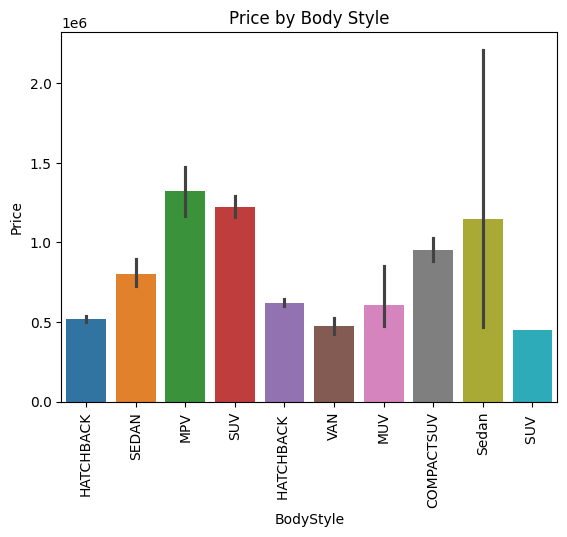

In [35]:
sns.barplot(x = 'BodyStyle', y = 'Price', data = df, hue = 'BodyStyle').set_title('Price by Body Style')
plt.xticks(rotation = 90)

MPV, SUV and Sedan are the top 3 car body styles with the highest resale value. Therefore, we can assume that these body styles are more preferred in the car market and have a good resale value. This also shows that my assumption was correct however, the Hatchback body style cars despite being in majority have lower resale value.

### Location based Price Distribution

/tmp/ipython-input-3946332960.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
/tmp/ipython-input-3946332960.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
/tmp/ipython-input-3946332960.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'Car Estate'),
 Text(7, 0, 'OM Motors'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

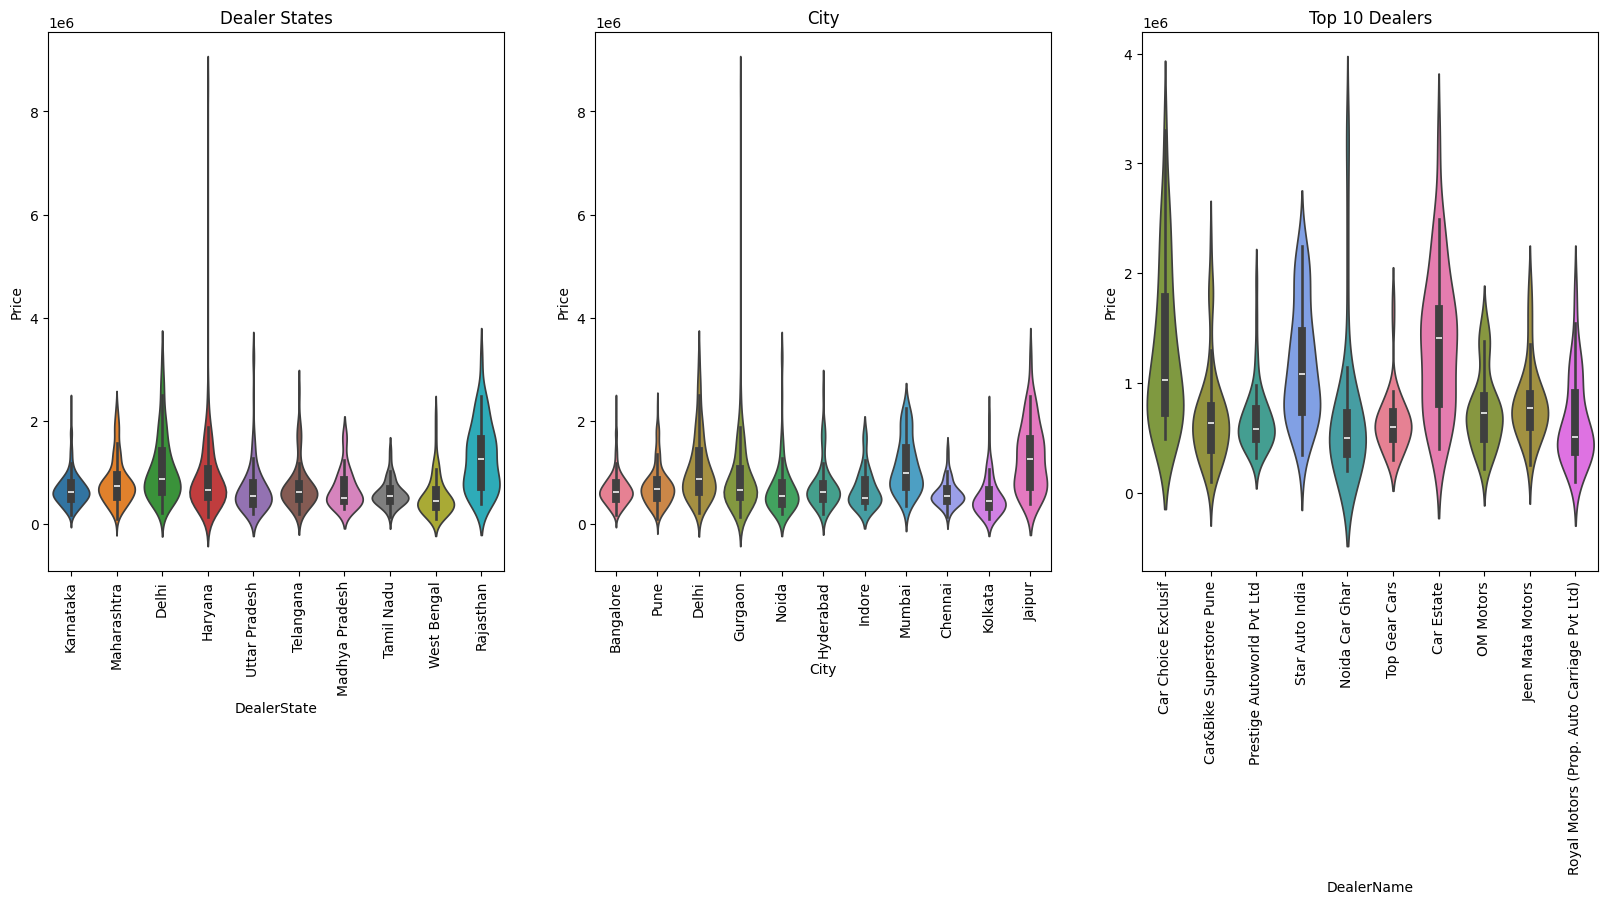

In [36]:
fig, ax = plt.subplots(1,3,figsize=(20,7))
sns.violinplot(x = 'DealerState', y = 'Price', data = df, ax = ax[0], hue = 'DealerState').set_title('Dealer States')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
sns.violinplot(x = 'City',y = 'Price', data = df, ax = ax[1], hue = 'City').set_title('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
sns.violinplot(x = 'DealerName',y = 'Price', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2], hue = 'DealerName').set_title('Top 10 Dealers')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

In the above graph we can see the price distribution based on the state, city and the dealer name. In the state graph, we can see that the cars in Rajastan have the highest price followed by Delhi. Moreover, there are some outliers in the graph which os visible from the violinplot where there is strong peak incase of Haryana. In the city graph, we can see that the cars in Jaipur have the highest price followed by Mumbai and Delhi. Moreover, there are some outliers in the graph which os visible from the violinplot where there is strong peak incase of Gurgaon. In the dealer name graph, we can see the top 10 dealers along with their price distribution. Here, Car Estate has the highest price followed by Star Auto India and Car Choice. Moreover, there are some outliers in the graph which os visible from the violinplot where there is strong peak incase of Noida Car Ghar.

## Data Preprocessing Part 2

Dropping column car model beacause, it has too many unique values and it will increase the dimensionality of the dataset.

In [37]:
df.drop('Model', axis = 1, inplace = True)

### Label Encoding

In [38]:
cols = df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Company [12  7 19  5 13 21 11  6 17 16  9  4 20 10  1  3 18 14  0  8 22 15  2]
FuelType [4 1 0 2 5 3]
Colour [61 56 34  0  9 11 66 47 49 38 14 71 72 30 74 52 39 28 60  7 54 62 40 13
 20 70 63 12 24 23 35 26 29 15 31  1 68  4  8 73 22 44 57 65 42 50 32 64
 19 43 46 33 16 27 53 25 10 69 51 17  6 48 59 58  5  3 18 45 67 36 21 55
  2 37 75 41]
BodyStyle [1 5 3 6 2 9 4 0 8 7]
Owner [0 1 2 3]
DealerState [2 4 0 1 8 7 3 6 9 5]
DealerName [52 38  4  1 56 29  0 34 47 51 11 21  9 10 43 33  7 16  5 12 42 17 27 50
 45  6 20 36 23 41 32 31 18  2 48 15 54 40 55 13 49 25 35 46 24 14 44 19
 39 28 26  3 53 30  8 22 37]
City [ 0 10  2  3  9  4  5  8  1  7  6]


### Outlier Removal

In [39]:
cols = df.select_dtypes(include=['int64','float64']).columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1), df['Price'], test_size=0.2, random_state=42)

## Model Building

I will be using the following regression models:
- Decision Tree Regressor
- Random Forest Regressor
- Ridge Regressor

### Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

#### Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV
para = {
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [2,4,6,8],
    'min_samples_split' : [2,4,6,8],
    'random_state' : [0,42]
}
grid = GridSearchCV(estimator=dtr, param_grid=para, cv=5, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [43]:
dtr = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=42)
dtr.fit(X_train, y_train)
print(dtr.score(X_train, y_train))

0.7709748363868894


In [44]:
dtr_pred = dtr.predict(X_test)

### Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

#### Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV
para = {
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [2,4,6,8],
    'min_samples_split' : [2,4,6,8],
    'random_state' : [0,42]
}

grid = GridSearchCV(estimator=rfr, param_grid=para, cv=5, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [47]:
rfr = RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=0)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))

0.8922093892033637


In [48]:
rfr_pred = rfr.predict(X_test)

## Model Evaluation

### Distribution Plot

/tmp/ipython-input-1388221342.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = y_test, ax = ax[0], color = 'r', hist = False, label = 'Actual').set_title('Decision Tree Regressor')
/tmp/ipython-input-1388221342.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = dtr_

<Axes: title={'center': 'Random Forest Regressor'}, ylabel='Density'>

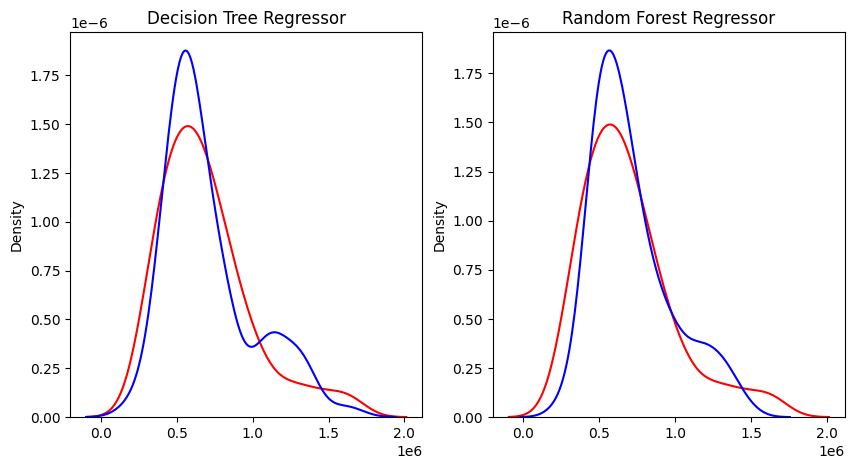

In [49]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.distplot(x = y_test, ax = ax[0], color = 'r', hist = False, label = 'Actual').set_title('Decision Tree Regressor')
sns.distplot(x = dtr_pred, ax = ax[0], color = 'b', hist = False, label = 'Predicted')
sns.distplot(x = y_test, ax = ax[1], color = 'r', hist = False, label = 'Actual').set_title('Random Forest Regressor')
sns.distplot(x = rfr_pred, ax = ax[1], color = 'b', hist = False, label = 'Predicted')

### Model Metrics

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Decision Tree Regressor')
print('Mean Squared Error : ', mean_squared_error(y_test, dtr_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, dtr_pred))
print('R2 Score : ', r2_score(y_test, dtr_pred))
print('Random Forest Regressor')
print('Mean Squared Error : ', mean_squared_error(y_test, rfr_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, rfr_pred))
print('R2 Score : ', r2_score(y_test, rfr_pred))

Decision Tree Regressor
Mean Squared Error :  45585786671.20511
Mean Absolute Error :  143988.5965345904
R2 Score :  0.5044410153036336
Random Forest Regressor
Mean Squared Error :  28952122030.700592
Mean Absolute Error :  122585.28783370154
R2 Score :  0.6852640867684735


## Feature Importance

Text(0.5, 1.0, 'Random Forest Regressor')

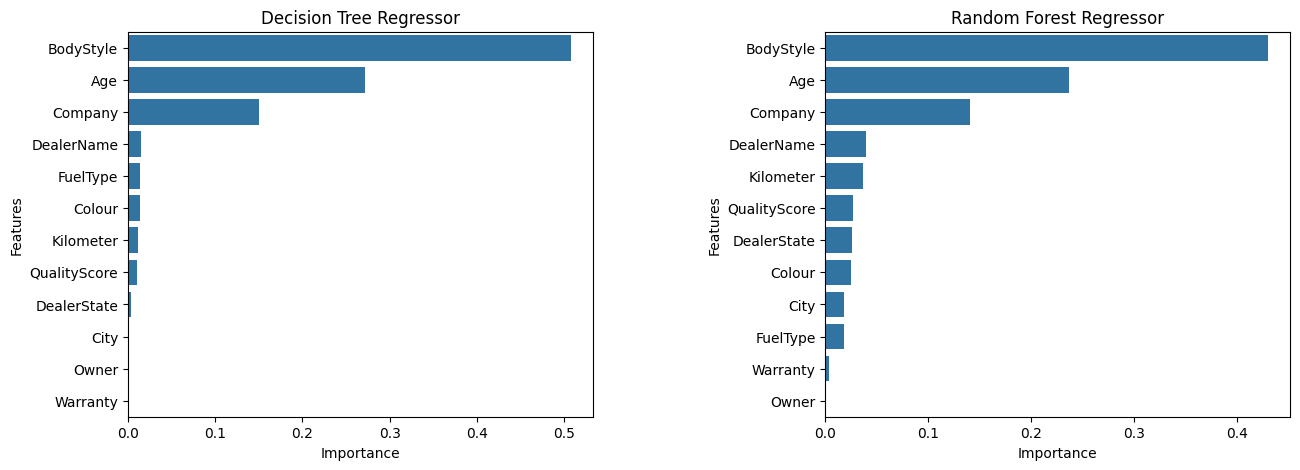

In [51]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':dtr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[0]).set_title('Decision Tree Regressor')
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':rfr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[1]).set_title('Random Forest Regressor')

## Conclusion

This project successfully applies regression techniques to predict car prices in major Indian metro cities using key vehicle attributes. The exploratory analysis shows that factors such as brand, fuel type, body style, mileage, age, ownership status, color, and quality score significantly influence resale value. Budget-friendly brands like Maruti Suzuki, Hyundai, and Honda appear in higher numbers due to strong demand, while premium brands such as MG, Mercedes-Benz, BMW, Volvo, and KIA achieve higher prices. Lower mileage, younger cars, and first-owner vehicles consistently command better resale prices, while location and dealer also contribute to price variation.

Among the regression models implemented, the Random Forest Regressor outperforms the Decision Tree Regressor, delivering higher accuracy and lower error. Feature-importance analysis highlights that car age, body style, company, odometer reading, and fuel type are the most influential predictors. Overall, the project demonstrates that regression models can effectively capture market patterns and provide reliable price predictions for the Indian used-car market.